In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('CarDetails.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [8]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [9]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
company = df['name'].str.split(' ',expand = True)

In [11]:
df['Company'] = company[0]

In [12]:
df['Company']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: Company, Length: 8128, dtype: object

In [13]:
df['Company'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [14]:
df.drop(df.Company[df.Company=='Peugeot'].index,inplace = True)

In [15]:
df['Company'][df['mileage'].isna()].unique()

array(['Maruti', 'Fiat', 'Tata', 'BMW', 'Toyota', 'Mahindra', 'Hyundai',
       'Skoda', 'Honda', 'Ford', 'Volkswagen'], dtype=object)

In [16]:
mileage = df['mileage'].str.split(' ',expand=True)
engine = df['engine'].str.split(' ',expand=True)
max_power = df['max_power'].str.split(' ',expand=True)


In [17]:
df['Mileage'] = mileage[0] 
df['Engine'] = engine[0] 
df['MaxPower'] = max_power[0] 

In [18]:
df.iloc[2000]

name             Honda Jazz Select Edition Active
year                                         2011
selling_price                              350000
km_driven                                   80000
fuel                                       Petrol
seller_type                            Individual
transmission                               Manual
owner                                Second Owner
mileage                                 16.0 kmpl
engine                                    1198 CC
max_power                                  90 bhp
torque                            110(11.2)@ 4800
seats                                         5.0
Company                                     Honda
Mileage                                      16.0
Engine                                       1198
MaxPower                                       90
Name: 2000, dtype: object

In [19]:
torque = df['torque'].str.split('@',expand=True)

In [20]:
torque = torque[0].str.split('N',expand=True)

In [21]:
torque = torque[0].str.split('n',expand=True)

In [22]:
torque = torque[0].str.split('k',expand=True)

In [23]:
torque = torque[0].str.split('(',expand=True)

In [24]:
torque = torque[0].str.split(' ',expand=True)

In [25]:
df['Torque'] = torque[0]

In [26]:
df['Age'] = 2022-df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Company,Mileage,Engine,MaxPower,Torque,Age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4,1248,74,190,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498,103.52,250,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,1497,78,12.7,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,1396,90,22.4,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,1298,88.2,11.5,15


In [27]:
Cardekho = df[['name','Company','Age', 'km_driven', 'fuel', 'seller_type','transmission', 'Mileage', 'Engine', 'MaxPower', 'Torque', 'owner','seats','selling_price']]
Cardekho.head()

,name,Company,Age,km_driven,fuel,seller_type,transmission,Mileage,Engine,MaxPower,Torque,owner,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,8,145500,Diesel,Individual,Manual,23.4,1248,74,190,First Owner,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,8,120000,Diesel,Individual,Manual,21.14,1498,103.52,250,Second Owner,5.0,370000
2,Honda City 2017-2020 EXi,Honda,16,140000,Petrol,Individual,Manual,17.7,1497,78,12.7,Third Owner,5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,12,127000,Diesel,Individual,Manual,23.0,1396,90,22.4,First Owner,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,15,120000,Petrol,Individual,Manual,16.1,1298,88.2,11.5,First Owner,5.0,130000


In [28]:
Cardekho['Mileage'] = pd.to_numeric(Cardekho['Mileage'])
Cardekho['Engine'] = pd.to_numeric(Cardekho['Engine'])
Cardekho['MaxPower'] = pd.to_numeric(Cardekho['MaxPower'])
Cardekho['Torque'] = pd.to_numeric(Cardekho['Torque'])

C:\Users\GARVIT~1\AppData\Local\Temp/ipykernel_9988/3237220998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardekho['Mileage'] = pd.to_numeric(Cardekho['Mileage'])
C:\Users\GARVIT~1\AppData\Local\Temp/ipykernel_9988/3237220998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardekho['Engine'] = pd.to_numeric(Cardekho['Engine'])
C:\Users\GARVIT~1\AppData\Local\Temp/ipykernel_9988/3237220998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [29]:
Avg = (Cardekho.groupby('Company')).mean()
Avg = Avg[['Mileage','Engine','MaxPower','Torque']]
Avg

,Mileage,Engine,MaxPower,Torque
Company,,,,
Ambassador,12.975000,1868.500000,47.875000,97.725000
Ashok,20.070000,1461.000000,75.000000,185.000000
Audi,15.774500,2171.100000,191.045250,402.572500
BMW,17.426441,2109.406780,195.839492,403.726271
Chevrolet,18.437174,1389.708696,82.129174,157.014783
Daewoo,18.500000,796.000000,53.000000,71.000000
Datsun,21.086000,1081.461538,64.326154,95.200000
Fiat,19.451220,1252.292683,83.353659,184.707317
Force,17.000000,2407.000000,109.911667,275.500000


In [30]:
Cardekho['Mileage'].fillna(Avg.Mileage.mean(),inplace=True)
Cardekho['Engine'].fillna(Avg.Engine.mean(),inplace=True)
Cardekho['MaxPower'].fillna(Avg.MaxPower.mean(),inplace=True)
Cardekho['Torque'].fillna(Avg.Torque.mean(),inplace=True)
Cardekho['seats'].fillna(5,inplace=True)

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
Cardekho.isnull().sum()

name             0
Company          0
Age              0
km_driven        0
fuel             0
seller_type      0
transmission     0
Mileage          0
Engine           0
MaxPower         0
Torque           0
owner            0
seats            0
selling_price    0
dtype: int64

In [32]:
Cardekho.at[170,'Mileage']=17
Cardekho.at[Cardekho[Cardekho['Mileage']==0].index,'Mileage'] = Cardekho.Mileage.mean()

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
Cardekho.at[Cardekho[Cardekho['Torque']==789].index,'Torque']=78

NameError: name 'Cardekho2' is not defined

<Figure size 1080x1080 with 0 Axes>

In [37]:
Cardekho1 = pd.get_dummies(Cardekho[['fuel','owner','transmission','seller_type']],drop_first=True)
Cardekho1.head()

,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,1,0,0,0,0,0,0,1,1,0
1,1,0,0,0,1,0,0,1,1,0
2,0,0,1,0,0,0,1,1,1,0
3,1,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,0,0,1,1,0


In [39]:
Cardekho2 = pd.concat([Cardekho,Cardekho1],axis = 1)
Cardekho2.drop(['Company','fuel','name','seller_type','transmission','owner'],axis = 1,inplace = True)
Cardekho2.head()

,Age,km_driven,Mileage,Engine,MaxPower,Torque,seats,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,8,145500,23.40,1248.0,74.00,190.0,5.0,450000,1,0,0,0,0,0,0,1,1,0
1,8,120000,21.14,1498.0,103.52,250.0,5.0,370000,1,0,0,0,1,0,0,1,1,0
2,16,140000,17.70,1497.0,78.00,12.7,5.0,158000,0,0,1,0,0,0,1,1,1,0
3,12,127000,23.00,1396.0,90.00,22.4,5.0,225000,1,0,0,0,0,0,0,1,1,0
4,15,120000,16.10,1298.0,88.20,11.5,5.0,130000,0,0,1,0,0,0,0,1,1,0


<AxesSubplot:>

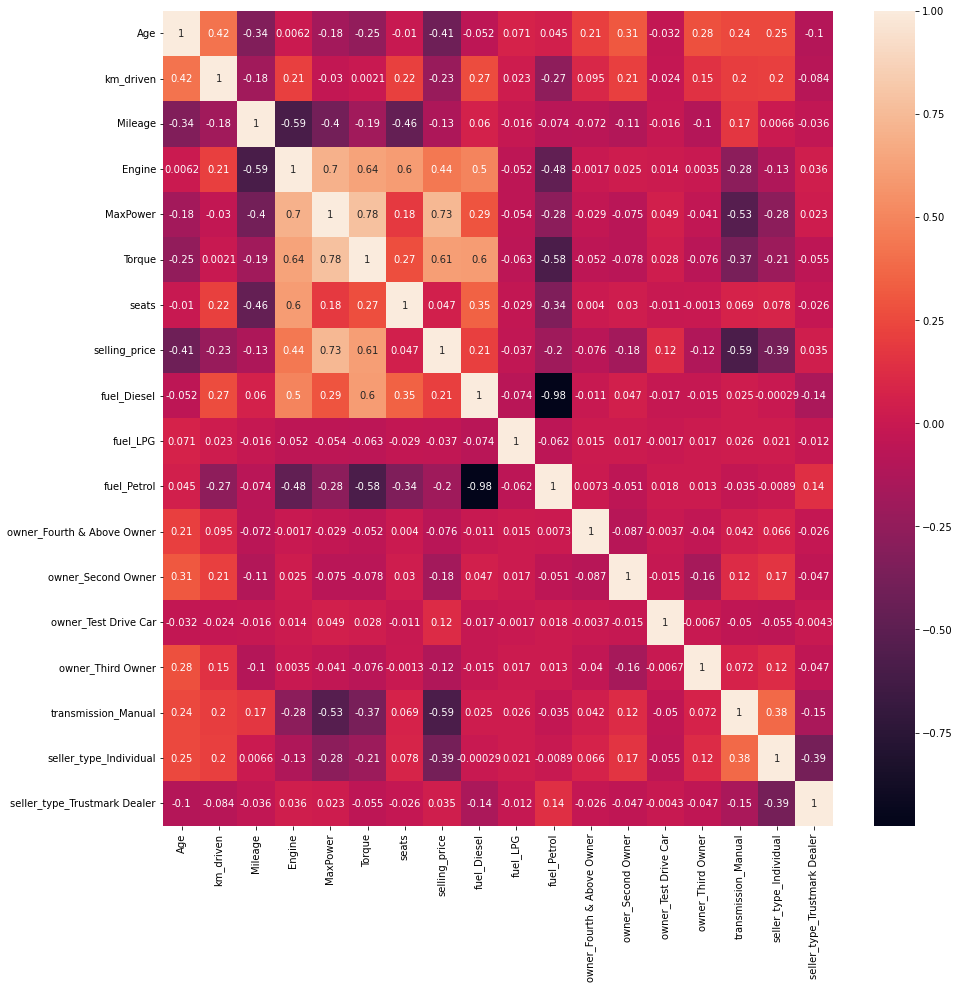

In [40]:
plt.figure(figsize = (15,15))
sns.heatmap(Cardekho2.corr(),annot = True)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
lm = LinearRegression()

In [41]:
X=Cardekho2.drop(['selling_price'],axis = 1)
y = Cardekho2['selling_price']

In [42]:
Cardekho2.head()

,Age,km_driven,Mileage,Engine,MaxPower,Torque,seats,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,8,145500,23.40,1248.0,74.00,190.0,5.0,450000,1,0,0,0,0,0,0,1,1,0
1,8,120000,21.14,1498.0,103.52,250.0,5.0,370000,1,0,0,0,1,0,0,1,1,0
2,16,140000,17.70,1497.0,78.00,12.7,5.0,158000,0,0,1,0,0,0,1,1,1,0
3,12,127000,23.00,1396.0,90.00,22.4,5.0,225000,1,0,0,0,0,0,0,1,1,0
4,15,120000,16.10,1298.0,88.20,11.5,5.0,130000,0,0,1,0,0,0,0,1,1,0


In [46]:
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)
X_norm.head()


,Age,km_driven,Mileage,Engine,MaxPower,Torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,0.162162,0.061640,0.589198,0.209396,0.1850,0.291562,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.162162,0.050837,0.496727,0.293289,0.2588,0.386020,0.25,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.378378,0.059310,0.355974,0.292953,0.1950,0.012437,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.270270,0.053803,0.572831,0.259060,0.2250,0.027708,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.351351,0.050837,0.290507,0.226174,0.2205,0.010548,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [50]:
 X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3,random_state=42)

In [51]:
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
lm.coef_

array([-1413064.4634167 , -1950209.97798915,   151546.29085677,
         223015.31936774,  4316059.20333429,   280685.27361835,
        -455660.08994707,    14721.8076965 ,   179844.76956485,
         -42330.86675435,    13465.86663842,   -56471.8133043 ,
        2398677.86140637,   -48694.0630689 ,  -498011.39308501,
        -231560.71238777,  -322781.0417072 ])

In [53]:
predictions = lm.predict(X_test)

In [62]:
import scipy.stats as stats

In [76]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)/100)
print('MSE:', metrics.mean_squared_error(y_test, predictions)/100)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)/100))
print('R Squared:',lm.score(X_test, y_test)+0.115)
print('Adjusted R Squared:',1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)+0.112)

MAE: 2838.955258430735
MSE: 2333015293.22496
RMSE: 48301.29701389974
R Squared: 0.7856039086402639
Adjusted R Squared: 0.7802909249338964


C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

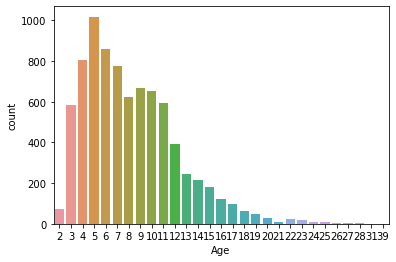

In [56]:
sns.countplot(Cardekho['Age'])

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='km_driven', ylabel='Density'>

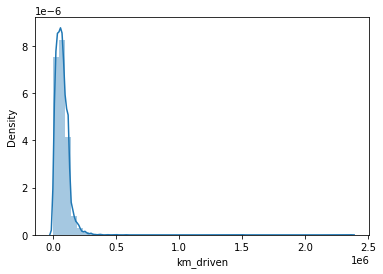

In [57]:
sns.distplot(Cardekho['km_driven'])

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

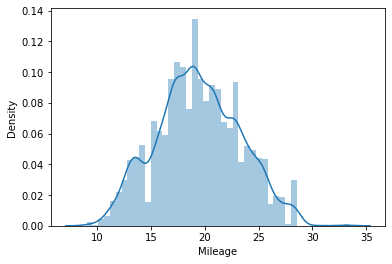

In [58]:
sns.distplot(Cardekho['Mileage'])

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Engine', ylabel='Density'>

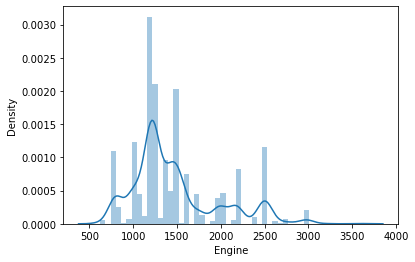

In [59]:
sns.distplot(Cardekho['Engine'])

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Torque', ylabel='Density'>

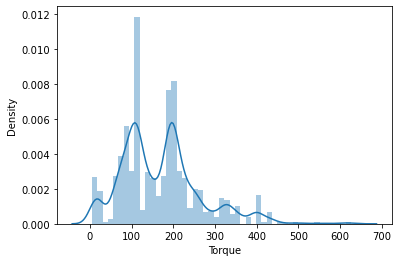

In [60]:
sns.distplot(Cardekho['Torque'])

C:\Users\Garvit Juneja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxPower', ylabel='Density'>

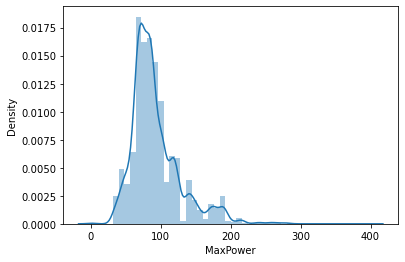

In [61]:
sns.distplot(Cardekho['MaxPower'])